<a href="https://colab.research.google.com/github/eunpro/academy/blob/main/exam06_classification_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이진분류기 : True/False => 출력값 1개

다중분류기 : 출력값 여러개

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
iris = load_iris()
print(type(iris))
print('=======================data shape============================')
print('Data', iris.data.shape)
print('Label', iris.target.shape)
print('First five data :', iris.data[0:5])
print('First five label :', iris.target[0:5])
print('iris dataset keys\n', iris.keys())

<class 'sklearn.utils.Bunch'>
=======================data shape============================
Data (150, 4)
Label (150,)
First five data : [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First five label : [0 0 0 0 0]
iris dataset keys
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
#타겟 3가지 : 최종 분류해야 할 붓꽃의 종류
print(iris.target_names) #iris 데이터셋에 target클래스가 3가지
#피쳐 4가지 : 잎사귀의 길이 너비 등 4가지
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
x = iris.data
y = iris.target.reshape(-1,1)
print(y[0:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


 sparse data(희소 데이터)와 dense data(밀집 데이터)

saprse data는 차원/전체 공간에 비해 데이터가 있는 공간이 매우 협소한 데이터를 의미

(data with narrow space of data in contrast to dimension/total space)

반대로 dense data는 차원/전체 공간에 비해 데이터가 있는 공간이 빽빽하게 차 있는 데이터를 의미

(data with dense space of data in contrast to dimension/total space)

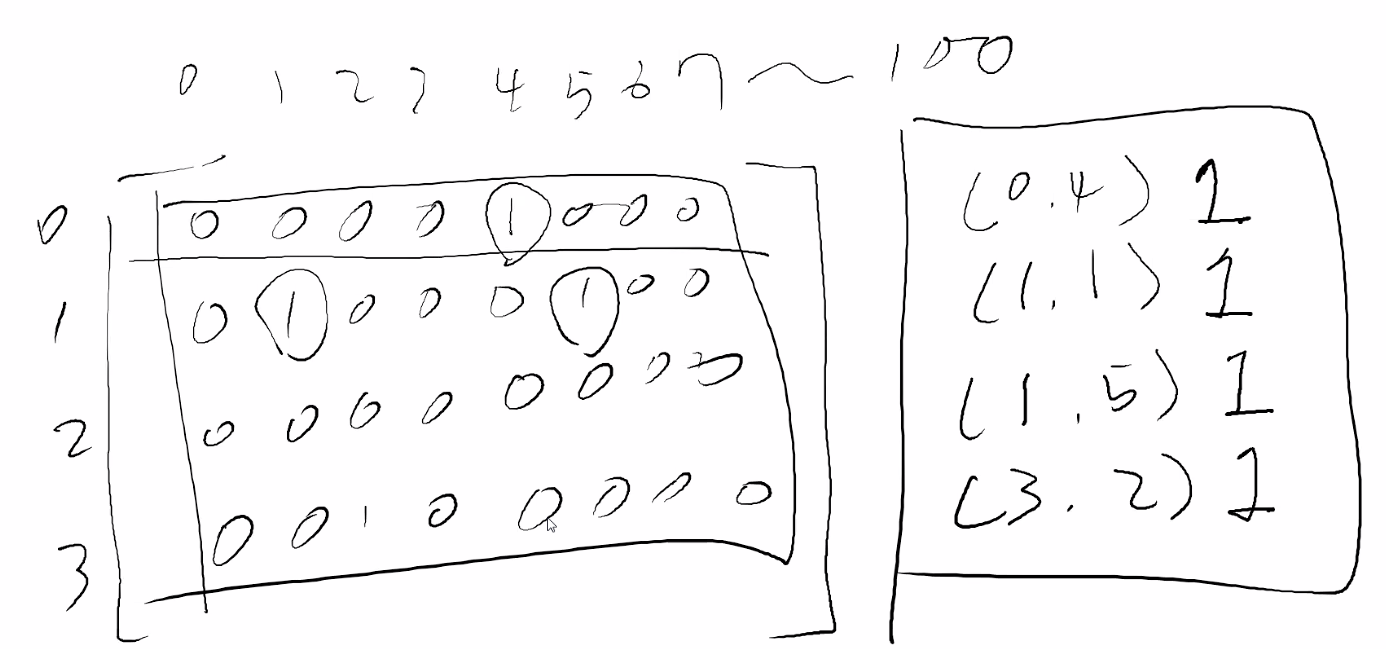

left: sparse=False / right: sparse=True

In [ ]:
#OneHotEncoder: 희소행렬로 표시 
encoder = OneHotEncoder(sparse=False) #좌표값으로 희소행렬의 1인 값을 표시
encoded_y = encoder.fit_transform(y)
print(encoded_y.shape)
print(encoded_y[:5])

(150, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


random_state : random_seed를 주면 랜덤하게 뽑지만 코드 실행할 때마다 같은 랜덤값 똑같이 뽑음

   ㄴ 랜덤값의 초기값 설정해줌(코드의 재현성 위해 설정)
   
random_seed 설정 안하면 코드 실행할 때마다 다른 것을 뽑음

train_test_split설명
https://teddylee777.github.io/scikit-learn/train-test-split

In [ ]:
X_train, X_test, Y_train, Y_test =train_test_split(
    x, encoded_y, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(120, 4) (120, 3)
(30, 4) (30, 3)


In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=4,
                activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
#다중분류기에서는 맨 마지막 function은 softmax사용
#softmax의 총 합 1
model.add(Dense(3,activation='softmax'))  #output3개

In [ ]:
#learning rate: 어느 정도의 크기로 기울기가 줄어드는 지점으로 이동하겠는가를 나타내는 지표
opt = Adam(lr = 0.01) #발산할 수 있으므로 learning rate설정
model.compile(opt, loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               1280      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 1539      
Total params: 101,763
Trainable params: 101,763
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
fit_hist = model.fit(X_train, Y_train,
                     batch_size=5, epochs=5, verbose=1)

Epoch 1/5
24/24 [==============================] - 0s 3ms/step - loss: 0.7886 - accuracy: 0.6667
Epoch 2/5
24/24 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.7250
Epoch 3/5
24/24 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9417
Epoch 4/5
24/24 [==============================] - 0s 2ms/step - loss: 0.2789 - accuracy: 0.8750
Epoch 5/5
24/24 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9250



class 3개 = 이진분류기 3개
class 10개 = 이진분류기 10개



[검증하기]

In [ ]:
score = model.evaluate(X_test,Y_test, verbose=0)
print('Final test set accuracy : ', score[1])

Final test set accuracy :  0.8333333134651184


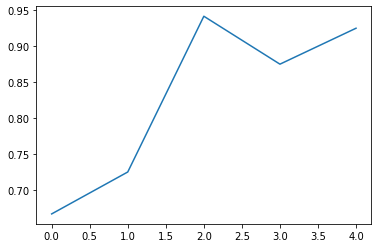

In [ ]:
plt.plot(fit_hist.history['accuracy'])
plt.show()

In [ ]:
labels = iris.target_names
my_sample = np.random.randint(30) #0~29까지 범위
sample = X_test[my_sample]
print(sample) #하나 뽑아 모델에 들어가면 맨 앞의 수만 들어감
sample = sample.reshape(1,4)
print(sample) #차원을 늘려주어 1차원 array 내에 숫자 4개를 모델에 적용됨
pred = model.predict(sample)
print(pred)
print(Y_test[my_sample])
print('Target : ', labels[np.argmax(Y_test[my_sample])])
print('Rrediction after learning is :',
      labels[np.argmax(pred)])

[5.7 2.9 4.2 1.3]
[[5.7 2.9 4.2 1.3]]
[[0.26713255 0.7235404  0.009327  ]]
[0. 1. 0.]
Target :  versicolor
Rrediction after learning is : versicolor
